In [1]:
import Pkg;
Pkg.add("Plots")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


Escribe un algoritmo que estime el valor de π y que te permita visualizar el gráfico, asegúrate de incluir el conteo del número de puntos rojos, número de puntos totales, y la respectiva estimación de π

Estimación de π: 2.68
Puntos dentro del círculo: 67
Puntos totales: 100


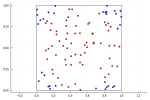

In [4]:
using Plots

function monte_carlo_pi(N::Int)
    # Inicializar contador de puntos dentro del círculo
    inside_circle = 0
    # Generar N puntos uniformemente distribuidos en el cuadrado de 1x1
    x = rand(N)
    y = rand(N)
    for i in 1:N
        # Verificar si el punto está dentro del círculo
        if (x[i]-0.5)^2 + (y[i]-0.5)^2 <= 0.25
            inside_circle += 1
        end
    end
    # Calcular estimación de π
    pi_estimate = 4 * inside_circle / N
    return pi_estimate, inside_circle, N, x, y
end

N = 100 # Generar un cien puntos
pi_estimate, inside_circle, total_points, x, y = monte_carlo_pi(N)
println("Estimación de π: ", pi_estimate)
println("Puntos dentro del círculo: ", inside_circle)
println("Puntos totales: ", total_points)

# Definir función para verificar si un punto está dentro del círculo
circle(x, y) = (x-0.5)^2 + (y-0.5)^2 <= 0.25

# Graficar el cuadrado y el círculo
plot([0,1,1,0,0], [0,0,1,1,0], color=:black, aspect_ratio=:equal, legend=false)
plot!(x[circle.(x,y)], y[circle.(x,y)], seriestype=:scatter, color=:red)
plot!(x[.!circle.(x,y)], y[.!circle.(x,y)], seriestype=:scatter, color=:blue)

<font color='orange'>Bien hecho. <b>(6/6 puntos)</b></font>

En promedio, ¿cuántos puntos necesitas generar para obtener una precisión de ±0.01?


In [9]:
function monte_carlo_pi_error()
    n = 0
    pi_estimate = 0
    error = []
    while abs(pi_estimate - pi) > 0.01
        x, y = rand(), rand()
        if (x - 0.5)^2 + (y - 0.5)^2 <= 0.25
            n += 1
        end
        pi_estimate = 4n / (1 + length(error))
        push!(error, abs(pi_estimate - pi))
    end
    println("Se necesitaron ", length(error), " puntos para obtener una precisión de ±0.01")
    plot(error, xlabel = "Número de puntos", ylabel = "Error de la estimación", label = "Error vs Puntos")
    hline!([0.01], label = "Precisión deseada")
end

monte_carlo_pi_error (generic function with 1 method)

Realiza una gráfica del error de la estimación en función del número de puntos comparando contra el valor predeterminado de π de Julia

Se necesitaron 14 puntos para obtener una precisión de ±0.01


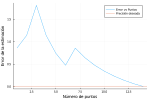

In [11]:
monte_carlo_pi_error()

<font color='orange'>La gráfica del inciso 3 está bien hecha <b>(2/2 puntos)</b>, pero no se hicieron cálculos estadísticos para obtener el <i>promedio</i> de puntos necesarios para obtener la precisión solicitada <b>(0.5/2 puntos)</b>.</font>

<font color='orange'>Calificación de este <i>notebook</i>: <b>8.5</b>.</font>

<font color='orange'>La calificación del proyecto intermedio es la mitad del total resultante al sumar la calificación de este <i>notebook</i> con los puntajes de los demás <b>Ejercicios</b> entregados.</font>